#Necessary Libraries

In [1]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

#Data Preprocessing

In [9]:
data = pd.read_csv('Spam_SMS.csv')

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    text = text.strip()  # Remove leading/trailing spaces
    return text

    # Apply the cleaning function to the Message column
data['Cleaned_Message'] = data['Message'].apply(clean_text)

# Convert 'ham' and 'spam' to numerical values (0 for ham, 1 for spam)
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Class'])

#Data Splitting

X = data['Cleaned_Message']
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#Training the model

In [10]:
#Vectorize the Text Data using TF-IDF

tfidf_vectorizer = TfidfVectorizer(max_features=3000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

#Logistic Regression Model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_tfidf, y_train)

# Predictions and Evaluating the model

y_pred = logreg_model.predict(X_test_tfidf)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9722
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       954
           1       0.99      0.82      0.89       161

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [11]:
import joblib
joblib.dump(logreg_model, 'logistic_regression_spam_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

#Testing the model by yourself

In [19]:
def test_message(message, model, vectorizer):

    # Clean the message using the same preprocessing method
    cleaned_message = clean_text(message)

    # Convert the message to the TF-IDF vector
    message_tfidf = vectorizer.transform([cleaned_message])

    # Predict using the trained model
    prediction = model.predict(message_tfidf)

    # Convert numerical prediction back to 'ham' or 'spam'
    return 'spam' if prediction[0] == 1 else 'ham'

# Example usage of the function
test_sms = "Congratulations! You've won a free trip to Bahamas. Call now!"
result = test_message(test_sms, logreg_model, tfidf_vectorizer)
print(f"The message '{test_sms}' is classified as: {result}")


The message 'Congratulations! You've won a free trip to Bahamas. Call now!' is classified as: spam


#Data Visualization

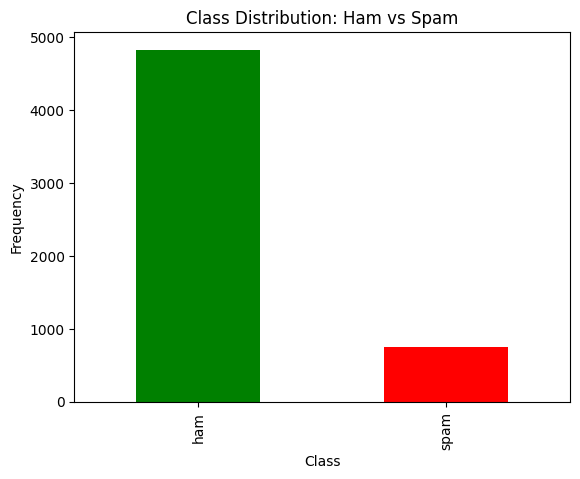

In [16]:
import matplotlib.pyplot as plt

# Plot the distribution of 'ham' and 'spam'
data['Class'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Class Distribution: Ham vs Spam')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

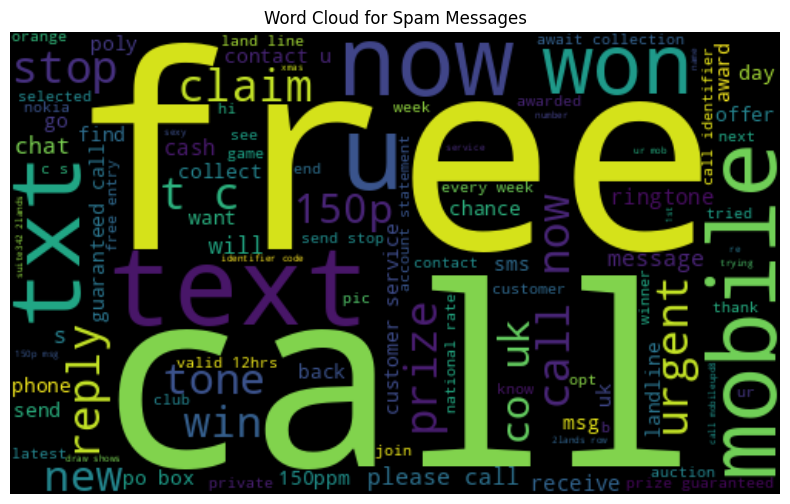

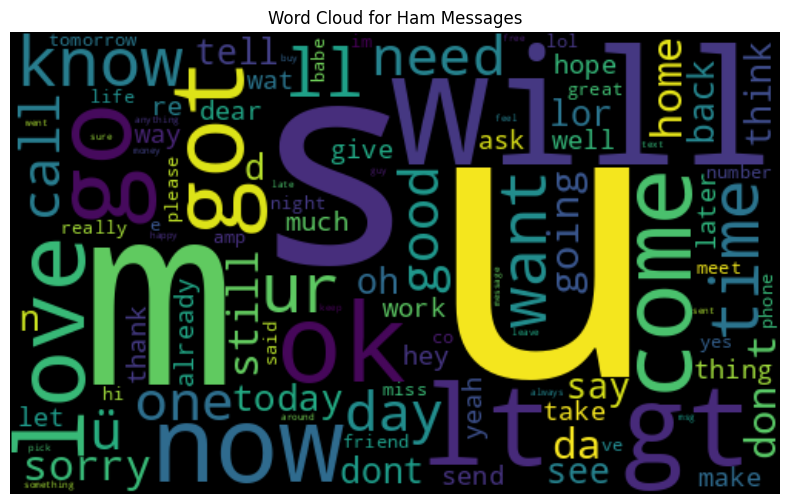

In [20]:
from wordcloud import WordCloud

# Generate word cloud for 'spam'
spam_words = ' '.join(data[data['Class'] == 'spam']['Cleaned_Message'])
spam_wc = WordCloud(width=500, height=300, max_words=100, background_color='black').generate(spam_words)
plt.figure(figsize=(10,6))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()

# Generate word cloud for 'ham'
ham_words = ' '.join(data[data['Class'] == 'ham']['Cleaned_Message'])
ham_wc = WordCloud(width=500, height=300, max_words=100, background_color='black').generate(ham_words)
plt.figure(figsize=(10,6))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Messages')
plt.show()
